<a href="https://colab.research.google.com/github/siddpatel1/DSPS_SPatel/blob/main/lab/sidpatel_autoencoder_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras

In [2]:
from keras.datasets import mnist 

In [3]:
#runtime to GPU

In [4]:
len(mnist.load_data())

2

In [5]:
(x_train, _), (x_test, _) = mnist.load_data() 

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
nimg, img_row, img_col = x_train.shape

In [8]:
import pylab as pl

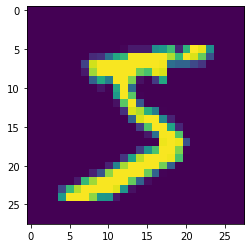

In [9]:
pl.imshow(x_train[0])

In [10]:
x_train.max()

255

In [11]:
x_train.dtype

dtype('uint8')

In [12]:
x_train = (x_train.astype(float) / 255)

In [13]:
x_test = (x_test.astype(float) / 255)

In [14]:
x_train = x_train.reshape(nimg, img_row*img_col)

In [15]:
x_test = x_test.reshape(x_test.shape[0], img_row*img_col)

In [16]:
y_train = x_train.copy()

In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
model_digits = Sequential()

In [19]:
model_digits.add(Dense(128, activation="relu", input_dim=img_col*img_row))
model_digits.add(Dense(64, activation="relu"))
model_digits.add(Dense(128, activation="relu"))
model_digits.add(Dense(img_col*img_row, activation="linear"))



In [20]:
model_digits.compile(optimizer="adadelta", loss="mean_squared_error")

In [21]:
model_digits.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 784)               101136    
                                                                 
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model_digits.fit(x_train, x_train, validation_data=(x_test,x_test), epochs=60, batch_size=100, verbose=1)

Epoch 1/60
600/600 [==============================] - 3s 4ms/step - loss: 0.1175 - val_loss: 0.1189
Epoch 2/60
600/600 [==============================] - 2s 4ms/step - loss: 0.1164 - val_loss: 0.1179
Epoch 3/60
600/600 [==============================] - 2s 4ms/step - loss: 0.1155 - val_loss: 0.1170
Epoch 4/60
600/600 [==============================] - 2s 4ms/step - loss: 0.1147 - val_loss: 0.1163
Epoch 5/60
600/600 [==============================] - 2s 4ms/step - loss: 0.1140 - val_loss: 0.1157
Epoch 6/60
600/600 [==============================] - 2s 4ms/step - loss: 0.1135 - val_loss: 0.1151
Epoch 7/60
600/600 [==============================] - 2s 4ms/step - loss: 0.1130 - val_loss: 0.1146
Epoch 8/60
600/600 [==============================] - 2s 4ms/step - loss: 0.1125 - val_loss: 0.1142
Epoch 9/60
600/600 [==============================] - 2s 4ms/step - loss: 0.1121 - val_loss: 0.1138
Epoch 10/60
600/600 [==============================] - 2s 4ms/step - loss: 0.1117 - val_loss: 0.1134

In [31]:
def compareinout(i, outim, testimg, initialshape=(28,28)):
  fig = pl.figure(figsize=(10,5))
  ax = fig.add_subplot(121) 
  ax.imshow(testimg[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = fig.add_subplot(122) 
  ax.imshow(outim[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


In [24]:
history.history['loss']

[0.1175239086151123,
 0.11640606820583344,
 0.11548472195863724,
 0.11471135914325714,
 0.11404870450496674,
 0.11346995085477829,
 0.11295580863952637,
 0.1124919205904007,
 0.11206811666488647,
 0.11167663335800171,
 0.11131133139133453,
 0.11096717417240143,
 0.11064080148935318,
 0.11032882332801819,
 0.11002901941537857,
 0.10973909497261047,
 0.10945787280797958,
 0.10918343812227249,
 0.1089148297905922,
 0.1086508110165596,
 0.10839080065488815,
 0.10813383013010025,
 0.1078791618347168,
 0.10762622207403183,
 0.10737447440624237,
 0.1071232259273529,
 0.10687217861413956,
 0.10662061721086502,
 0.1063682958483696,
 0.10611473023891449,
 0.1058594211935997,
 0.10560232400894165,
 0.10534262657165527,
 0.10508029162883759,
 0.10481490194797516,
 0.10454598069190979,
 0.10427325963973999,
 0.10399648547172546,
 0.10371515154838562,
 0.10342919826507568,
 0.1031380146741867,
 0.1028415784239769,
 0.10253958404064178,
 0.10223153233528137,
 0.10191764682531357,
 0.10159743577241898

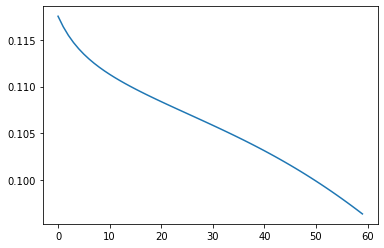

In [25]:
pl.plot(history.history["loss"])

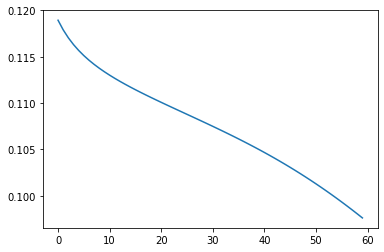

In [26]:
pl.plot(history.history["val_loss"])

In [29]:
output = model_digits.predict(x_test)

In [30]:
output.shape

(10000, 784)

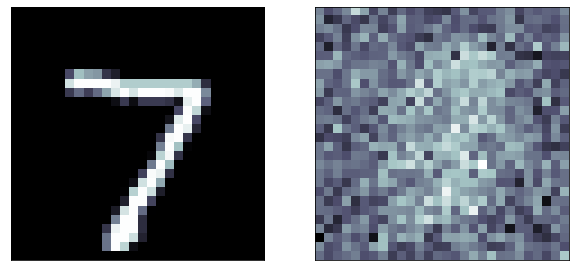

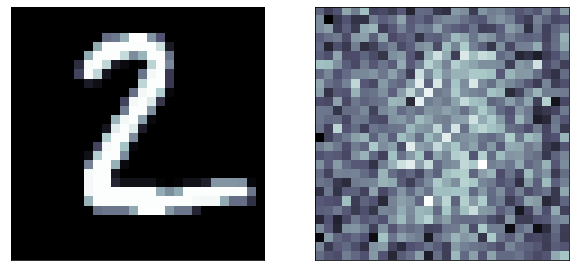

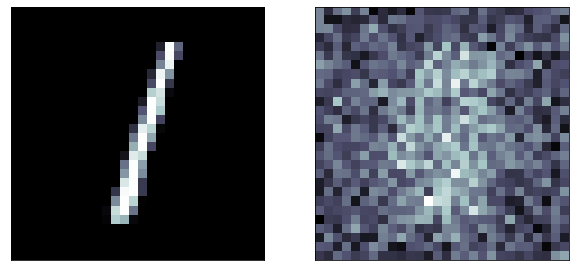

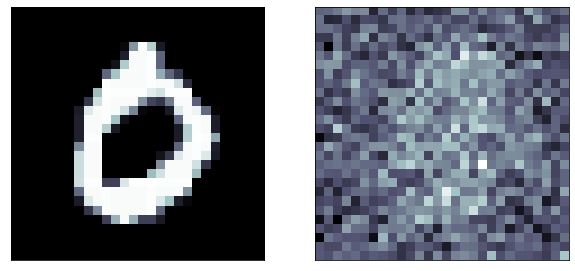

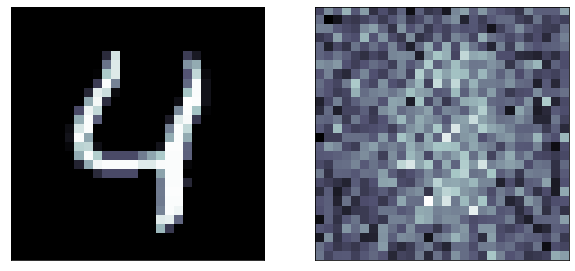

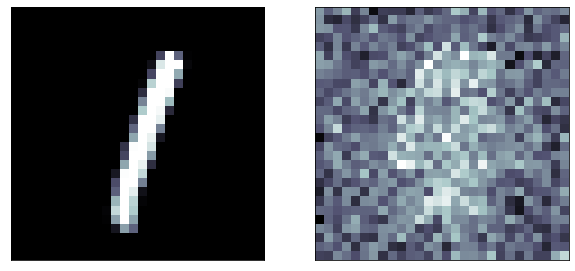

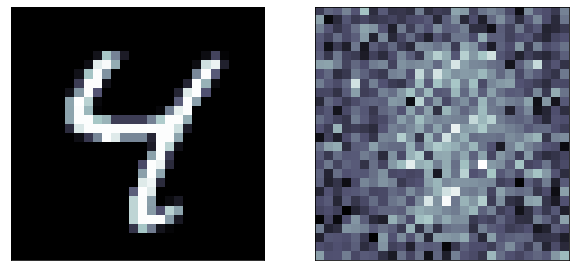

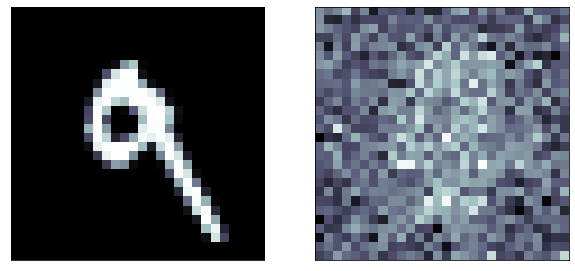

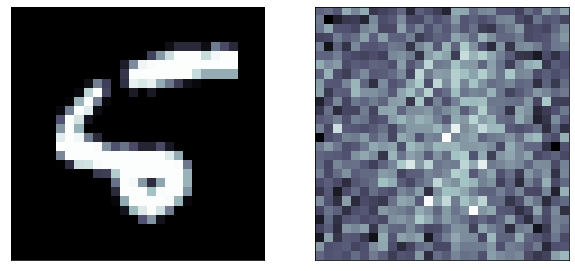

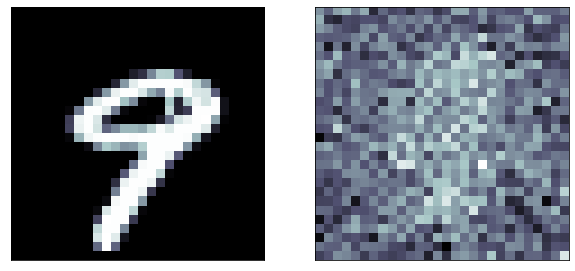

In [33]:
for i in range(10):
    compareinout(i, output, x_test, initialshape=(28,28))

In [34]:
from keras.callbacks import EarlyStopping

In [35]:
patience = EarlyStopping(monitor="val_loss", min_delta=0.01, patience=5)

In [36]:
ec = model_digits.fit(x_train, x_train, validation_data=(x_test,x_test), epochs=60, batch_size=100, verbose=1,
                 callbacks=[patience])

Epoch 1/60
600/600 [==============================] - 2s 4ms/step - loss: 0.0960 - val_loss: 0.0972
Epoch 2/60
600/600 [==============================] - 2s 4ms/step - loss: 0.0955 - val_loss: 0.0967
Epoch 3/60
600/600 [==============================] - 2s 4ms/step - loss: 0.0951 - val_loss: 0.0963
Epoch 4/60
600/600 [==============================] - 2s 4ms/step - loss: 0.0946 - val_loss: 0.0958
Epoch 5/60
600/600 [==============================] - 2s 4ms/step - loss: 0.0942 - val_loss: 0.0953
Epoch 6/60
600/600 [==============================] - 2s 4ms/step - loss: 0.0937 - val_loss: 0.0948


In [37]:
from keras import optimizers 

In [42]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.01)
model_digits.compile(loss="mean_squared_error",optimizer=opt)
patience2 = EarlyStopping(monitor="val_loss", min_delta=0.0001, patience=5)
history2 = model_digits.fit(x_train, x_train,
                               validation_data=(x_test,x_test),
                               epochs=20, batch_size=100, verbose=1, callbacks=patience2)

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0306 - val_loss: 0.0235
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0229 - val_loss: 0.0215
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0216 - val_loss: 0.0207
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0210 - val_loss: 0.0206
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0207 - val_loss: 0.0202
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0206 - val_loss: 0.0201
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0202 - val_loss: 0.0196
Epoch 8/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0201 - val_loss: 0.0196
Epoch 9/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0200 - val_loss: 0.0197
Epoch 10/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0198 - val_loss: 0.0193

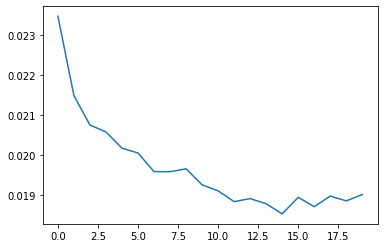

In [43]:
pl.plot(history2.history["val_loss"])

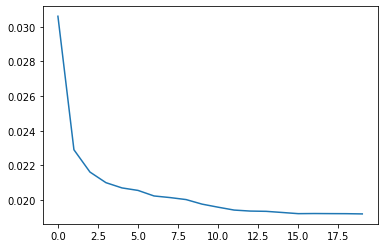

In [44]:
pl.plot(history2.history["loss"])

In [45]:
output2 = model_digits.predict(x_test)

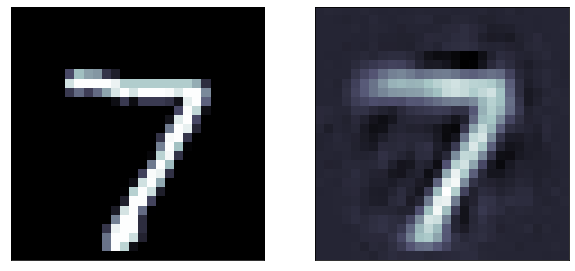

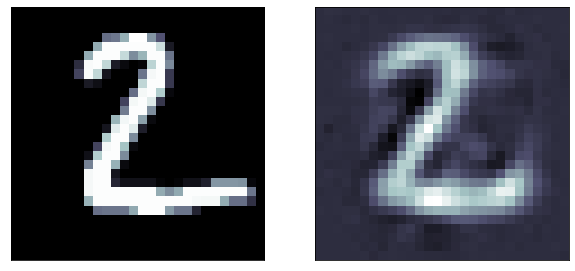

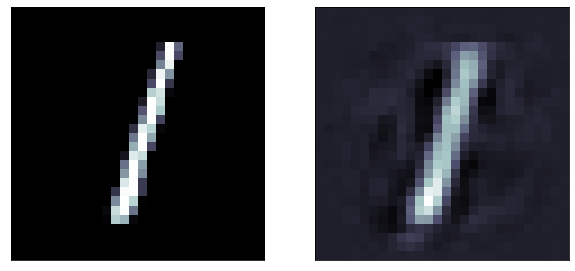

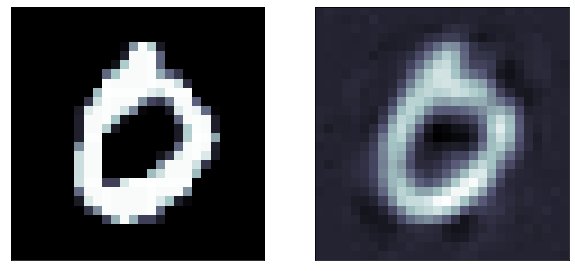

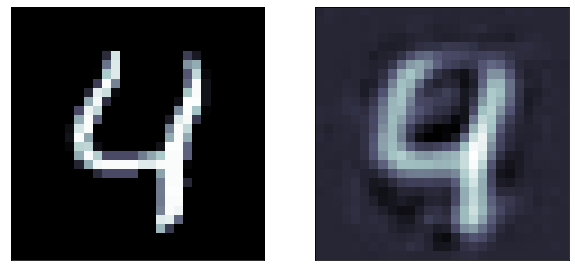

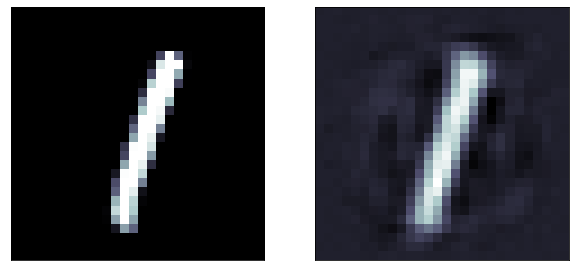

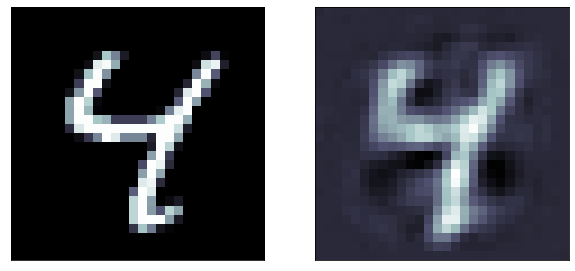

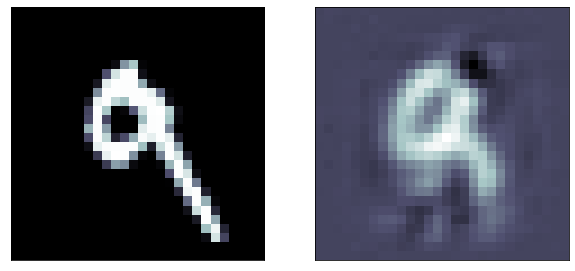

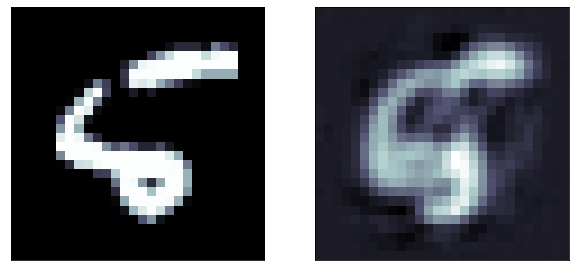

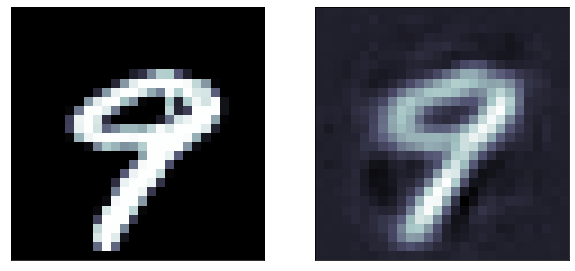

In [46]:
for i in range(10):
    compareinout(i, output2, x_test, initialshape=(28,28))

In [47]:
model_digits_sig = Sequential()

model_digits_sig.add(Dense(128, activation="relu", input_dim=img_col*img_row))
model_digits_sig.add(Dense(64, activation="relu"))
model_digits_sig.add(Dense(128, activation="relu"))
model_digits_sig.add(Dense(img_col*img_row, activation="sigmoid"))




In [48]:
opt2 = keras.optimizers.Adadelta(learning_rate=0.1)

In [49]:
model_digits_sig.compile(optimizer=opt2, loss="binary_crossentropy")

In [50]:
history3 = model_digits_sig.fit(x_train, x_train,
                               validation_data=(x_test,x_test),
                               epochs=20, batch_size=100, verbose=1)

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.4230 - val_loss: 0.2732
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2708 - val_loss: 0.2677
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2666 - val_loss: 0.2644
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2631 - val_loss: 0.2604
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2583 - val_loss: 0.2543
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2510 - val_loss: 0.2453
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2420 - val_loss: 0.2361
Epoch 8/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2340 - val_loss: 0.2287
Epoch 9/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2268 - val_loss: 0.2214
Epoch 10/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2200 - val_loss: 0.2150

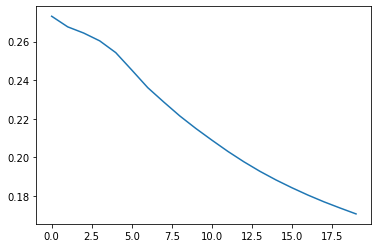

In [51]:
pl.plot(history3.history["val_loss"])

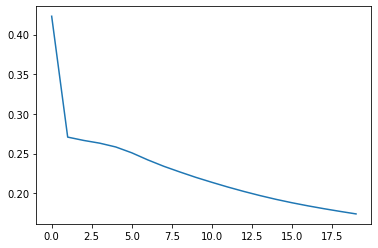

In [52]:
pl.plot(history3.history["loss"])

In [53]:
output_sig = model_digits_sig.predict(x_test)

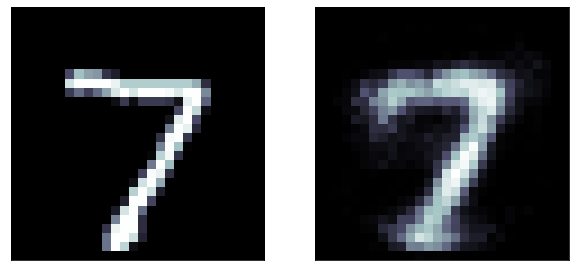

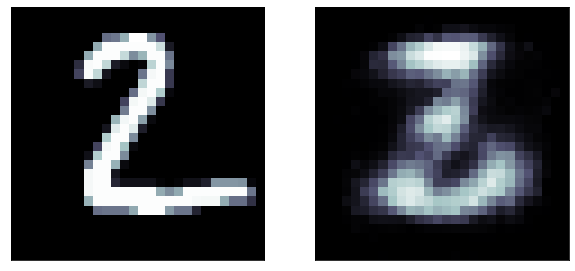

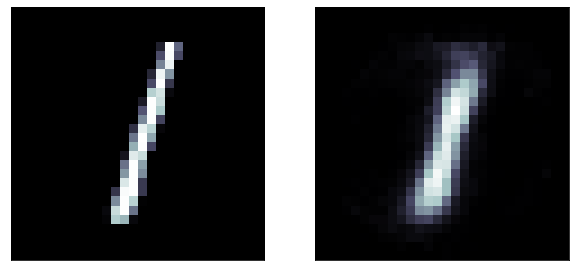

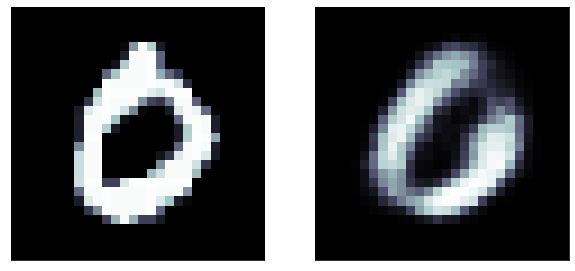

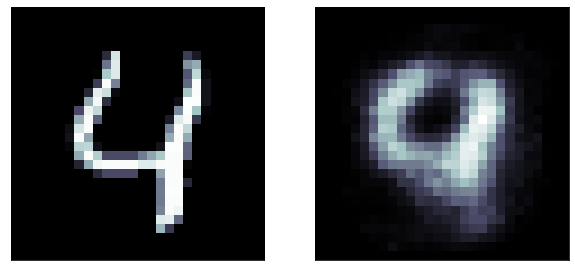

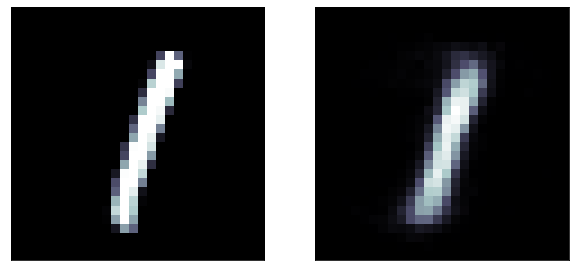

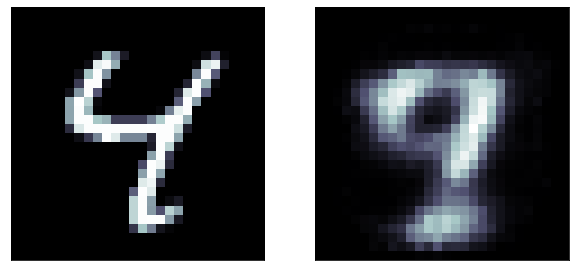

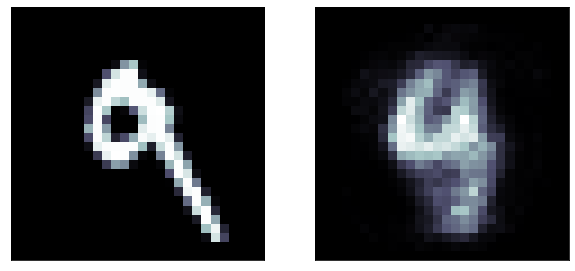

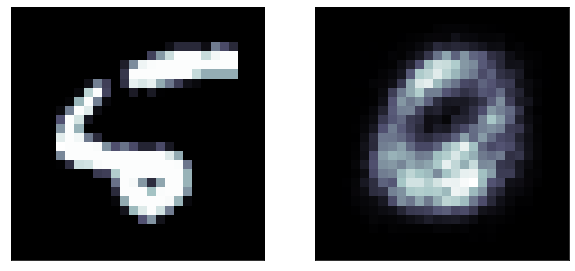

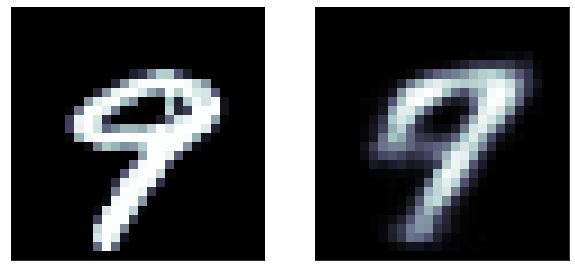

In [54]:
for i in range(10):
    compareinout(i, output_sig, x_test, initialshape=(28,28))